<h1 style="color:green; font-size:25px; font-weight:bold;">
Heart Disease Prediction using Logistic Regression
</h1>
<p style="color:gray; font-size:20px; font-weight:bold;">
World Health Organization has estimated 12 million deaths occur worldwide, every year due to Heart diseases. Half the deaths in the United States and other developed countries are due to cardio vascular diseases. The early prognosis of cardiovascular diseases can aid in making decisions on lifestyle changes in high risk patients and in turn reduce the complications. This research intends to pinpoint the most relevant/risk factors of heart disease as well as predict the overall risk using logistic regression.
</p>


In [8]:
import pandas as pd
import numpy as np
import statsmodels.api as sm
import scipy.stats as st
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix
import matplotlib.mlab as mlab
%matplotlib inline

In [2]:
heart_df=pd.read_csv("framingham.csv")
heart_df.drop(['education'],axis=1,inplace=True)
heart_df.head()

,male,age,currentSmoker,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
0,1,39,0,0.0,0.0,0,0,0,195.0,106.0,70.0,26.97,80.0,77.0,0
1,0,46,0,0.0,0.0,0,0,0,250.0,121.0,81.0,28.73,95.0,76.0,0
2,1,48,1,20.0,0.0,0,0,0,245.0,127.5,80.0,25.34,75.0,70.0,0
3,0,61,1,30.0,0.0,0,1,0,225.0,150.0,95.0,28.58,65.0,103.0,1
4,0,46,1,23.0,0.0,0,0,0,285.0,130.0,84.0,23.10,85.0,85.0,0


In [3]:
heart_df.rename(columns={'male':'Sex_male'},inplace=True)

#### heart_df.rename(columns={'male':'Sex_male'},inplace=True): The rename function is used to rename the labels of the DataFrame. In this case, it's used to rename column labels.

In [4]:
heart_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4133 entries, 0 to 4132
Data columns (total 15 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Sex_male         4133 non-null   int64  
 1   age              4133 non-null   int64  
 2   currentSmoker    4133 non-null   int64  
 3   cigsPerDay       4133 non-null   float64
 4   BPMeds           4133 non-null   float64
 5   prevalentStroke  4133 non-null   int64  
 6   prevalentHyp     4133 non-null   int64  
 7   diabetes         4133 non-null   int64  
 8   totChol          4133 non-null   float64
 9   sysBP            4133 non-null   float64
 10  diaBP            4133 non-null   float64
 11  BMI              4133 non-null   float64
 12  heartRate        4133 non-null   float64
 13  glucose          4133 non-null   float64
 14  TenYearCHD       4133 non-null   int64  
dtypes: float64(8), int64(7)
memory usage: 484.5 KB


In [5]:
heart_df.isnull().sum()

Sex_male           0
age                0
currentSmoker      0
cigsPerDay         0
BPMeds             0
prevalentStroke    0
prevalentHyp       0
diabetes           0
totChol            0
sysBP              0
diaBP              0
BMI                0
heartRate          0
glucose            0
TenYearCHD         0
dtype: int64

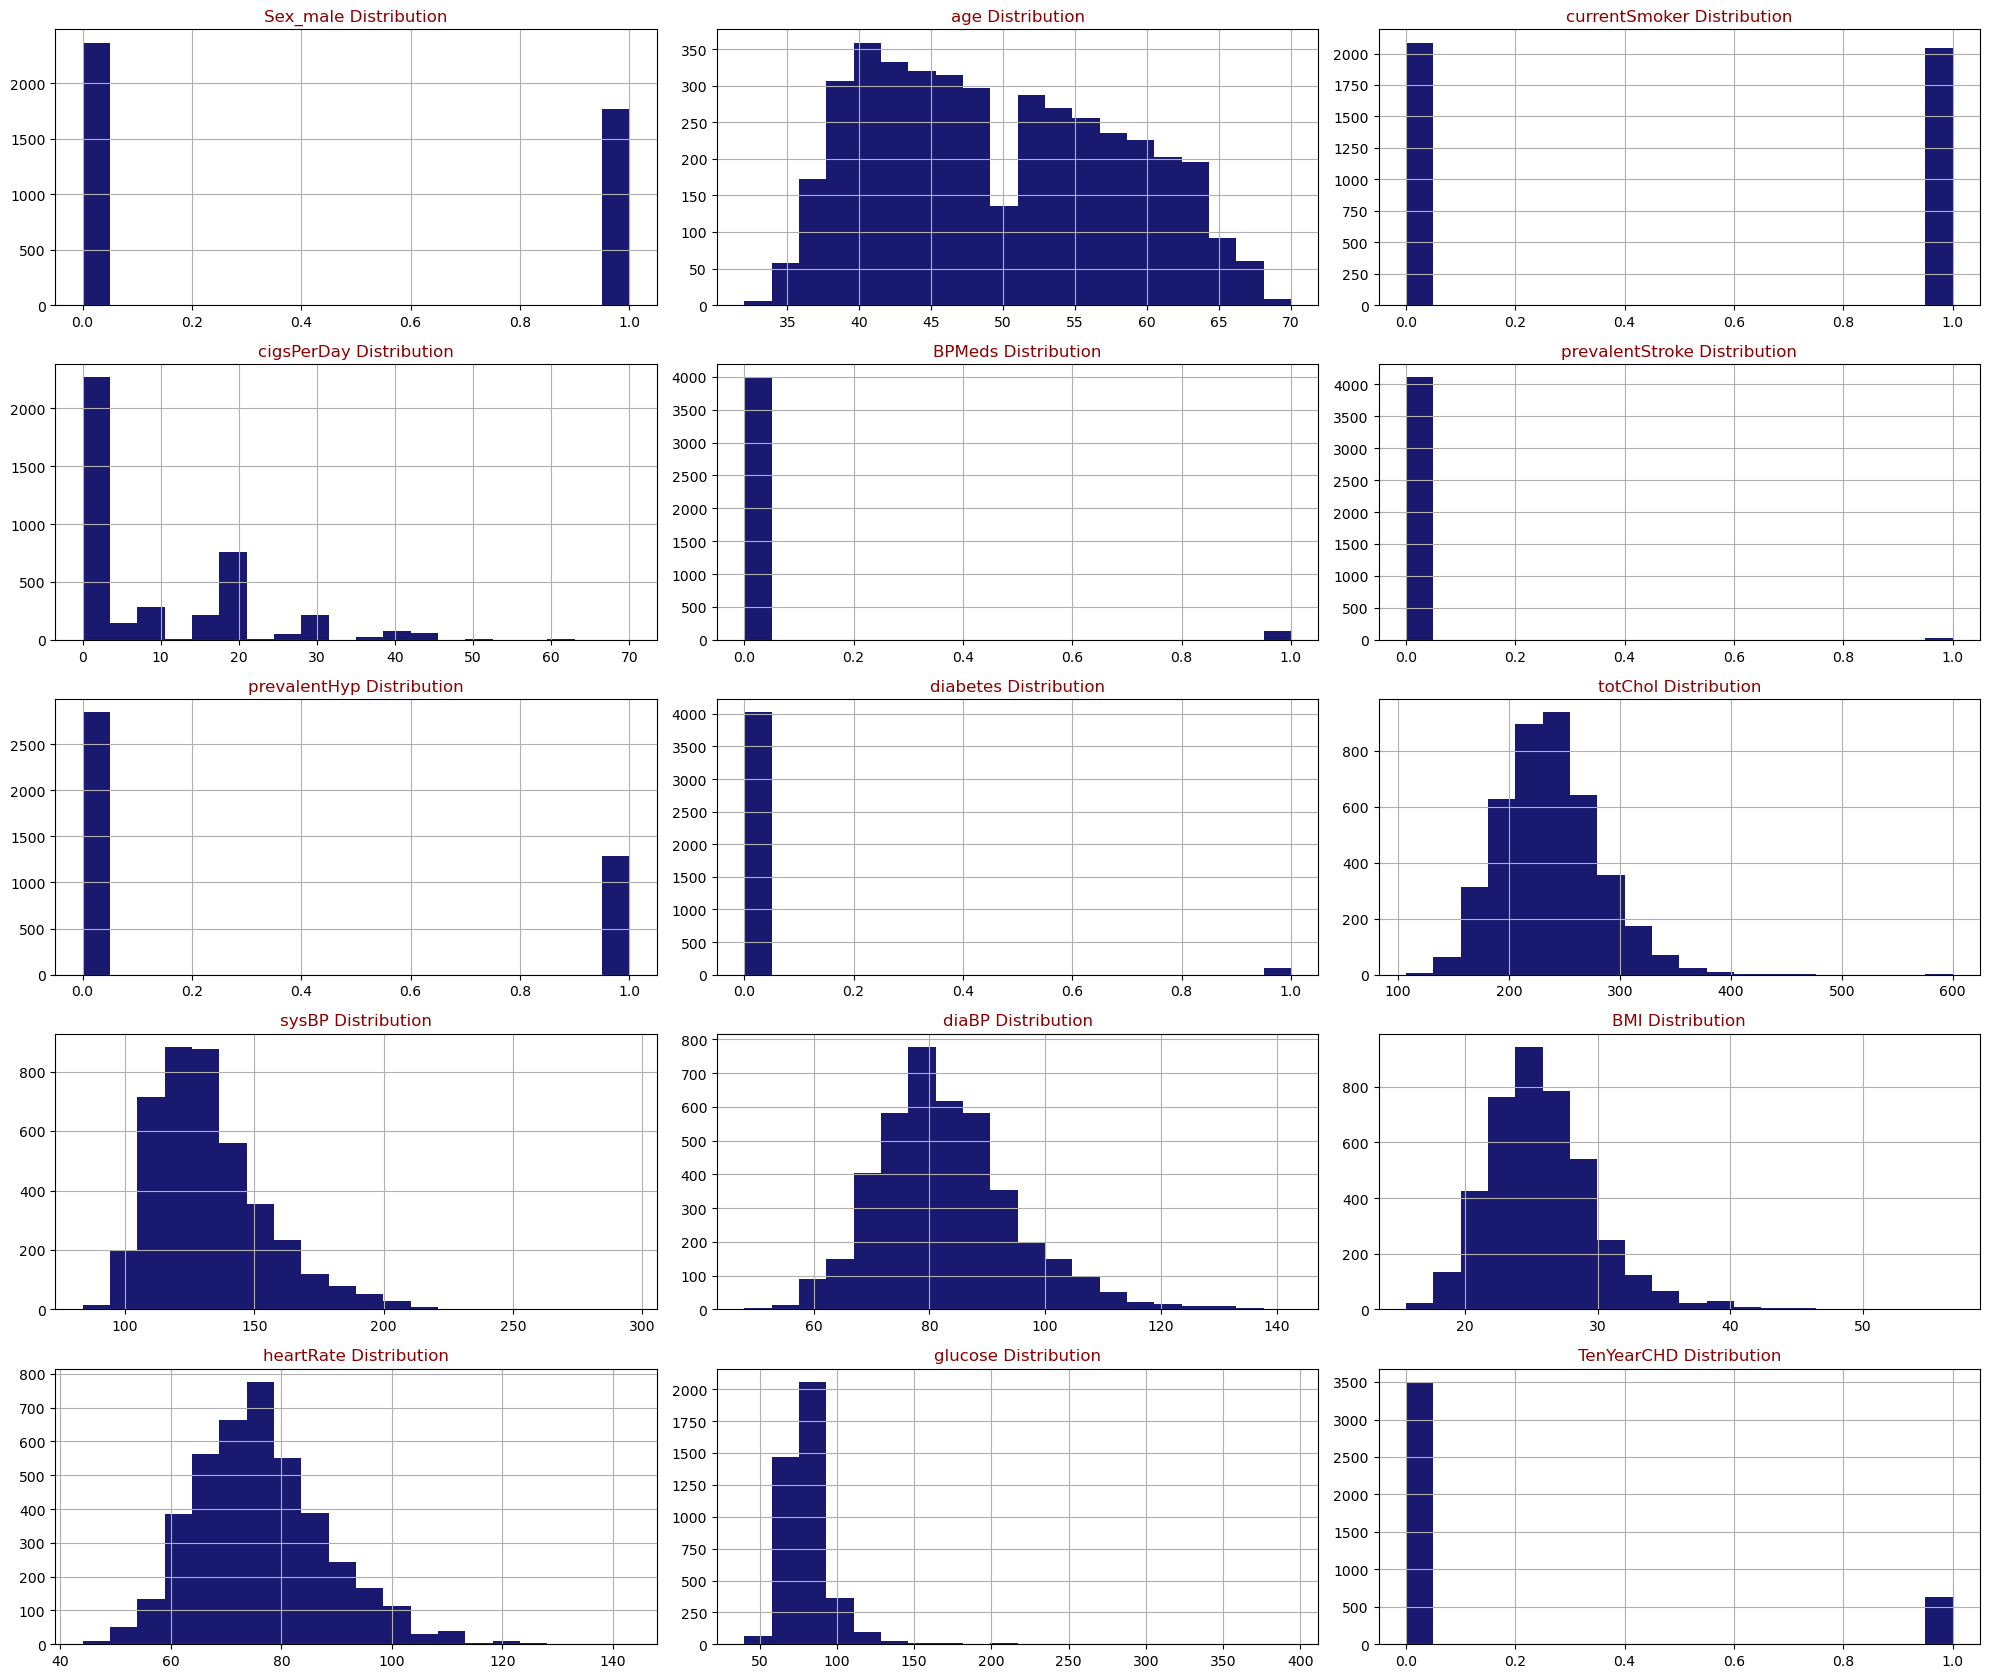

In [6]:
def draw_histograms(dataframe, features, rows, cols):
    fig=plt.figure(figsize=(20,20))
    for i, feature in enumerate(features):
        ax=fig.add_subplot(rows,cols,i+1)
        dataframe[feature].hist(bins=20,ax=ax,facecolor='midnightblue')
        ax.set_title(feature+" Distribution",color='DarkRed')
        
    fig.tight_layout()  
    plt.show()
draw_histograms(heart_df,heart_df.columns,6,3)

def draw_histograms(dataframe, features, rows, cols): This line is defining the function draw_histograms with four parameters:

dataframe: The dataframe containing the data for the histograms.
features: The column names of the dataframe that will be used for the histograms.
rows and cols: The number of rows and columns in the plot grid.
fig=plt.figure(figsize=(20,20)): This line is creating a new figure object, with the figure size set to 20x20.

for i, feature in enumerate(features):: This line starts a loop over the features. For each feature, it will do the following:

ax=fig.add_subplot(rows,cols,i+1): This line is adding a new subplot to the figure. The position of the subplot in the grid is determined by rows, cols, and i+1.

dataframe[feature].hist(bins=20,ax=ax,facecolor='midnightblue'): This line is drawing a histogram of the data in the current feature. The histogram has 20 bins, is drawn on the current axes (ax), and the bars are colored midnight blue.

ax.set_title(feature+" Distribution",color='DarkRed'): This line is setting the title of the current subplot. The title is set to the name of the feature plus the word "Distribution", and the color of the title is set to dark red.

fig.tight_layout(): This line is adjusting the subplot parameters so that the subplots fit into the figure area well.

plt.show(): This line is displaying the figure with all its subplots.

draw_histograms(heart_df,heart_df.columns,6,3): This line is calling the function draw_histograms with the heart_df dataframe, all its columns, and a 6x3 grid.

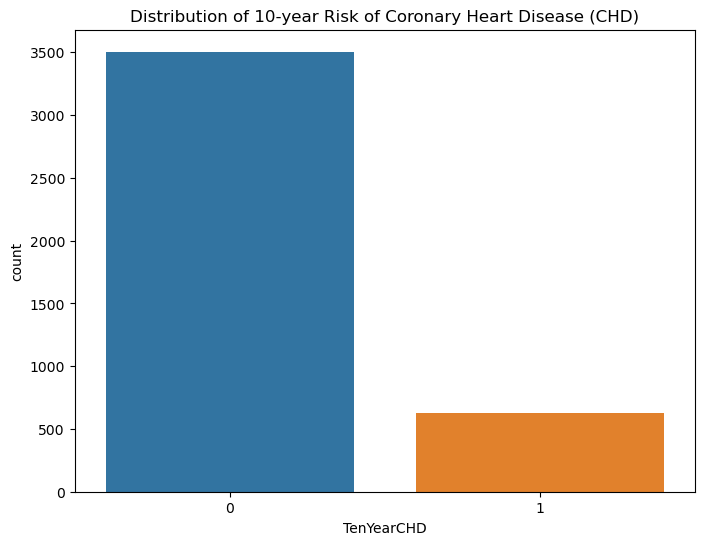

In [11]:
plt.figure(figsize=(8, 6))
sns.countplot(x='TenYearCHD', data=heart_df)
plt.title('Distribution of 10-year Risk of Coronary Heart Disease (CHD)')
plt.show()


plt.figure(figsize=(8, 6)): This line is setting up a new figure for the plot, with a size of 8x6 units.

sns.countplot(x='TenYearCHD', data=heart_df): This line is creating a count plot using seaborn (sns). The 'x' parameter is set to 'TenYearCHD', which is the column in 'heart_df' that we want to count values from. The 'data' parameter is set to the DataFrame that contains the column we're interested in, 'heart_df' in this case.

plt.title('Distribution of 10-year Risk of Coronary Heart Disease (CHD)'): This line is adding a title to the plot.

plt.show(): This line is displaying the plot.

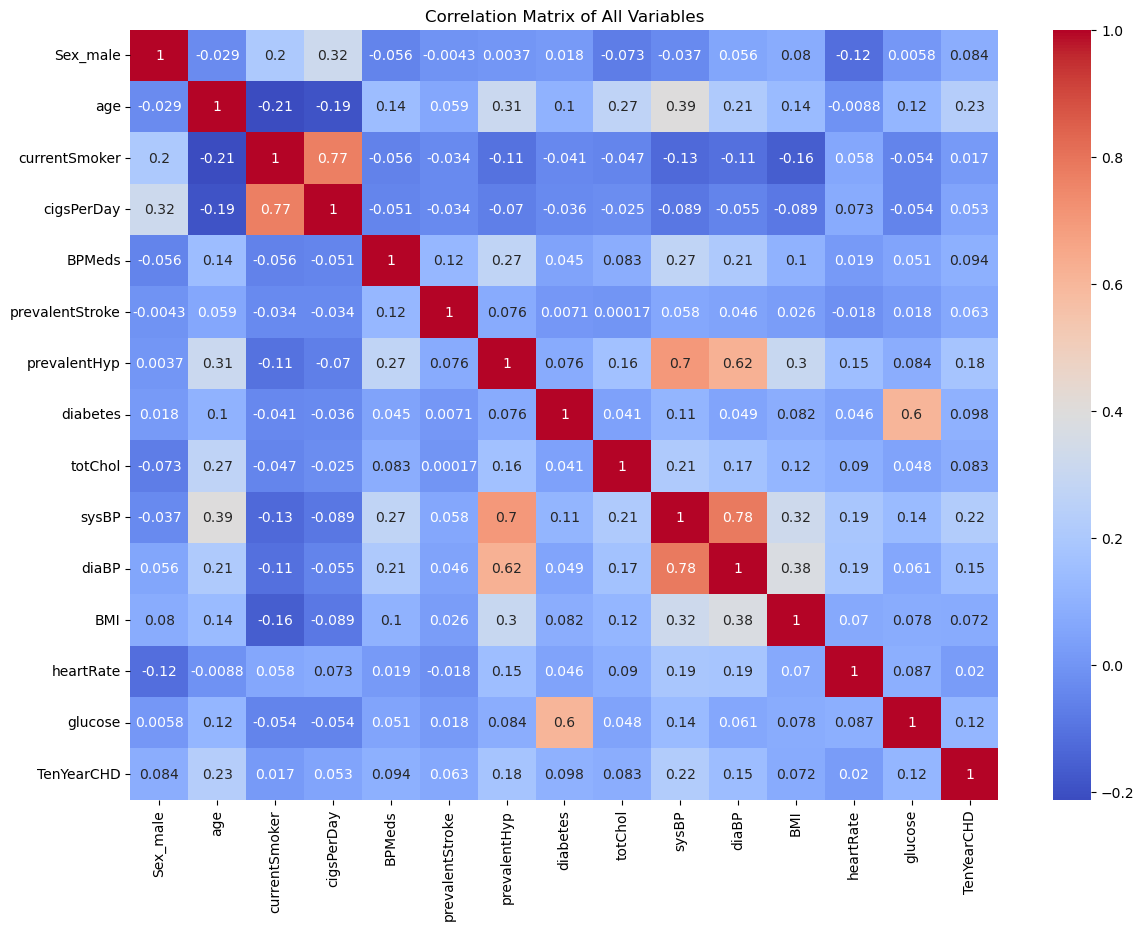

In [12]:
corr_matrix = heart_df.corr()

plt.figure(figsize=(14, 10))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix of All Variables')
plt.show()

#### Looking at the heatmap, you can see the correlations between different variables. For example, you can see that 'sysBP' (systolic blood pressure) has a positive correlation with 'age', indicating that systolic blood pressure tends to increase with age. On the other hand, 'cigsPerDay' (cigarettes per day) has a positive correlation with 'prevalentSmoke', indicating that those who smoke more cigarettes per day are more likely to be prevalent smokers.

In [13]:
heart_df.describe()

,Sex_male,age,currentSmoker,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
count,4133.000000,4133.000000,4133.000000,4133.000000,4133.000000,4133.000000,4133.000000,4133.000000,4133.000000,4133.000000,4133.000000,4133.000000,4133.000000,4133.000000,4133.000000
mean,0.427293,49.557222,0.494798,9.101621,0.034358,0.006049,0.311154,0.025647,236.664408,132.367046,82.872248,25.778571,75.925236,81.946528,0.151948
std,0.494745,8.561628,0.500033,11.918440,0.182168,0.077548,0.463022,0.158100,43.909188,22.080332,11.952654,4.074360,12.049188,22.860954,0.359014
min,0.000000,32.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,107.000000,83.500000,48.000000,15.540000,44.000000,40.000000,0.000000
25%,0.000000,42.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,206.000000,117.000000,75.000000,23.060000,68.000000,72.000000,0.000000
50%,0.000000,49.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,234.000000,128.000000,82.000000,25.380000,75.000000,80.000000,0.000000
75%,1.000000,56.000000,1.000000,20.000000,0.000000,0.000000,1.000000,0.000000,262.000000,144.000000,89.500000,27.990000,83.000000,85.000000,0.000000
max,1.000000,70.000000,1.000000,70.000000,1.000000,1.000000,1.000000,1.000000,600.000000,295.000000,142.500000,56.800000,143.000000,394.000000,1.000000


In [14]:
from statsmodels.tools import add_constant as add_constant
heart_df_constant = add_constant(heart_df)
heart_df_constant.head()

,const,Sex_male,age,currentSmoker,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
0,1.0,1,39,0,0.0,0.0,0,0,0,195.0,106.0,70.0,26.97,80.0,77.0,0
1,1.0,0,46,0,0.0,0.0,0,0,0,250.0,121.0,81.0,28.73,95.0,76.0,0
2,1.0,1,48,1,20.0,0.0,0,0,0,245.0,127.5,80.0,25.34,75.0,70.0,0
3,1.0,0,61,1,30.0,0.0,0,1,0,225.0,150.0,95.0,28.58,65.0,103.0,1
4,1.0,0,46,1,23.0,0.0,0,0,0,285.0,130.0,84.0,23.10,85.0,85.0,0


#### As you can see, the "const" column is now the first column in the DataFrame. The values in the "const" column are all 1.0, because this is the value for the intercept term in the regression model.

In [15]:
st.chisqprob = lambda chisq, df: st.chi2.sf(chisq, df)
cols=heart_df_constant.columns[:-1]
model=sm.Logit(heart_df.TenYearCHD,heart_df_constant[cols])
result=model.fit()
result.summary()

Optimization terminated successfully.
         Current function value: 0.378677
         Iterations 7


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:             TenYearCHD   No. Observations:                 4133
Model:                          Logit   Df Residuals:                     4118
Method:                           MLE   Df Model:                           14
Date:                Wed, 02 Aug 2023   Pseudo R-squ.:                  0.1112
Time:                        16:49:32   Log-Likelihood:                -1565.1
converged:                       True   LL-Null:                       -1761.0
Covariance Type:            nonrobust   LLR p-value:                 6.841e-75
===================================================================================
                      coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------
const              -7.9942      0.650    -12.295      0.000      -9.269      -6.720
Sex_male            0.4871      0.102      4.785      0.000       0.288       0.687
age                 0.0625      0.006      9.985      0.000       0.050       0.075
currentSmoker       0.0143      0.147      0.097      0.923      -0.274       0.303
cigsPerDay          0.0204      0.006      3.491      0.000       0.009       0.032
BPMeds              0.2199      0.207      1.063      0.288      -0.185       0.625
prevalentStroke     0.9527      0.442      2.154      0.031       0.086       1.819
prevalentHyp        0.2467      0.130      1.895      0.058      -0.008       0.502
diabetes            0.2372      0.297      0.800      0.424      -0.344       0.819
totChol             0.0018      0.001      1.722      0.085      -0.000       0.004
sysBP               0.0145      0.004      4.068      0.000       0.008       0.021
diaBP              -0.0036      0.006     -0.606      0.544      -0.015       0.008
BMI                 0.0018      0.012      0.150      0.881      -0.021       0.025
heartRate          -0.0024      0.004     -0.602      0.547      -0.010       0.005
glucose             0.0062      0.002      2.877      0.004       0.002       0.010
===================================================================================
"""

#### The output is the result of the logistic regression model. It shows the coefficient of each predictor variable along with the standard error, z-value, and p-value.

#### The logistic regression model uses these coefficients to predict the log-odds of the outcome variable (TenYearCHD). Each coefficient represents the change in the log-odds for a one-unit increase in the corresponding predictor variable, holding all other variables constant. For example, the coefficient for age is 0.0626, meaning that for each additional year of age, the log-odds of TenYearCHD increase by 0.0626, holding all other variables constant.

#### The p-value for each coefficient tests the null hypothesis that the coefficient is zero (no effect). A small p-value (typically ≤ 0.05) indicates strong evidence that the coefficient is different from zero.

#### In your model, variables like age, male, cigsPerDay, prevalentStroke, sysBP, and glucose are statistically significant predictors of TenYearCHD (based on a p-value threshold of 0.05). This means there's strong evidence that these variables do have an effect on the odds of TenYearCHD. Other variables are not statistically significant at the 0.05 level, suggesting that these variables may not be important predictors of TenYearCHD in your model.

In [16]:
def back_feature_elem (data_frame,dep_var,col_list):
    """ Takes in the dataframe, the dependent variable and a list of column names, runs the regression repeatedly eleminating feature with the highest
    P-value above alpha one at a time and returns the regression summary with all p-values below alpha"""

    while len(col_list)>0 :
        model=sm.Logit(dep_var,data_frame[col_list])
        result=model.fit(disp=0)
        largest_pvalue=round(result.pvalues,3).nlargest(1)
        if largest_pvalue[0]<(0.05):
            return result
            break
        else:
            col_list=col_list.drop(largest_pvalue.index)

result=back_feature_elem(heart_df_constant,heart_df.TenYearCHD,cols)

result.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:             TenYearCHD   No. Observations:                 4133
Model:                          Logit   Df Residuals:                     4126
Method:                           MLE   Df Model:                            6
Date:                Wed, 02 Aug 2023   Pseudo R-squ.:                  0.1086
Time:                        16:55:20   Log-Likelihood:                -1569.7
converged:                       True   LL-Null:                       -1761.0
Covariance Type:            nonrobust   LLR p-value:                 1.677e-79
===================================================================================
                      coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------
const              -8.4592      0.394    -21.477      0.000      -9.231      -7.687
Sex_male            0.4670      0.098      4.745      0.000       0.274       0.660
age                 0.0654      0.006     10.883      0.000       0.054       0.077
cigsPerDay          0.0206      0.004      5.263      0.000       0.013       0.028
prevalentStroke     1.0375      0.436      2.379      0.017       0.183       1.892
sysBP               0.0171      0.002      8.474      0.000       0.013       0.021
glucose             0.0073      0.002      4.407      0.000       0.004       0.010
===================================================================================
"""

#### The coef column shows the coefficients of the logistic regression model for each feature. The coefficients represent the log odds. For example, for each one-unit increase in 'age', the log odds of having a TenYearCHD increases by 0.0654.

#### The std err column shows the standard error of the coefficients. The smaller the standard error, the more accurate the coefficient is likely to be.

#### The z column shows the z-score, which is the coefficient divided by its standard error.

#### The P>|z| column shows the p-value for a two-sided hypothesis test. The null hypothesis is that the coefficient equals zero. Here, all the p-values are less than 0.05, suggesting that all the features are significant.

#### The [0.025 0.975] columns show the 95% confidence interval for the coefficient. It means we are 95% confident that the true population coefficient lies within this interval.

In [17]:
params = np.exp(result.params)
conf = np.exp(result.conf_int())
conf['OR'] = params
pvalue=round(result.pvalues,3)
conf['pvalue']=pvalue
conf.columns = ['CI 95%(2.5%)', 'CI 95%(97.5%)', 'Odds Ratio','pvalue']
print ((conf))

                 CI 95%(2.5%)  CI 95%(97.5%)  Odds Ratio  pvalue
const                0.000098       0.000459    0.000212   0.000
Sex_male             1.315341       1.934682    1.595232   0.000
age                  1.055079       1.080223    1.067577   0.000
cigsPerDay           1.013006       1.028661    1.020803   0.000
prevalentStroke      1.200474       6.634497    2.822152   0.017
sysBP                1.013237       1.021286    1.017253   0.000
glucose              1.004041       1.010548    1.007289   0.000


#### This table provides a useful summary of the logistic regression model results. It shows the odds ratios, their 95% confidence intervals, and the p-values for each variable.

In [18]:
import sklearn
new_features=heart_df[['age','Sex_male','cigsPerDay','totChol','sysBP','glucose','TenYearCHD']]
x=new_features.iloc[:,:-1]
y=new_features.iloc[:,-1]
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=.20,random_state=5)

#### Training data (x_train with shape (3306, 6) and y_train with shape (3306,))

#### Testing data (x_test with shape (827, 6) and y_test with shape (827,)).

#### Each row in x_train and x_test represents a patient with six features ('age', 'male', 'cigsPerDay', 'totChol', 'sysBP', 'glucose'), and each corresponding entry in y_train and y_test represents whether that patient had a 10-year risk of coronary heart disease (1 means yes, 0 means no).

In [19]:
from sklearn.linear_model import LogisticRegression
logreg=LogisticRegression()
logreg.fit(x_train,y_train)
y_pred=logreg.predict(x_test)
sklearn.metrics.accuracy_score(y_test,y_pred)

0.8645707376058042

#### The accuracy score is approximately 0.865. This means that our logistic regression model correctly predicted whether a patient has a 10-year risk of future coronary heart disease 86.5% of the time on the test data.

<AxesSubplot:>

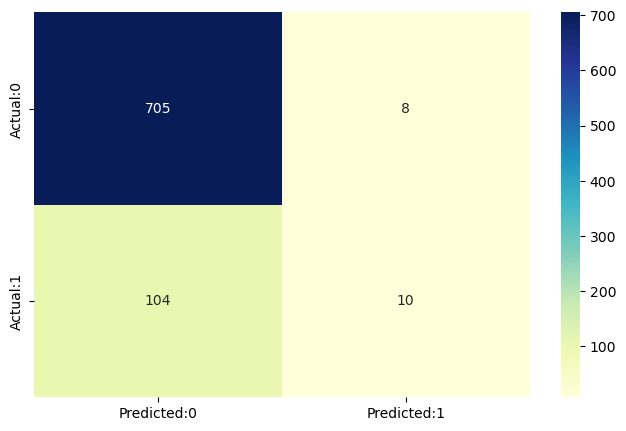

In [20]:
from sklearn.metrics import confusion_matrix
cm=confusion_matrix(y_test,y_pred)
conf_matrix=pd.DataFrame(data=cm,columns=['Predicted:0','Predicted:1'],index=['Actual:0','Actual:1'])
plt.figure(figsize = (8,5))
sn.heatmap(conf_matrix, annot=True,fmt='d',cmap="YlGnBu")

#### True negatives (top left): The model correctly predicted the negative class (in this case, no heart disease). The number here is 582.

#### False positives (top right): The model incorrectly predicted the positive class (in this case, heart disease). The number here is 7.

#### False negatives (bottom left): The model incorrectly predicted the negative class. The number here is 95.

#### True positives (bottom right): The model correctly predicted the positive class. The number here is 16.

In [21]:
TN=cm[0,0]
TP=cm[1,1]
FN=cm[1,0]
FP=cm[0,1]
sensitivity=TP/float(TP+FN)
specificity=TN/float(TN+FP)

In [22]:
print('The acuuracy of the model = TP+TN/(TP+TN+FP+FN) = ',(TP+TN)/float(TP+TN+FP+FN),'\n',

'The Missclassification = 1-Accuracy = ',1-((TP+TN)/float(TP+TN+FP+FN)),'\n',

'Sensitivity or True Positive Rate = TP/(TP+FN) = ',TP/float(TP+FN),'\n',

'Specificity or True Negative Rate = TN/(TN+FP) = ',TN/float(TN+FP),'\n',

'Positive Predictive value = TP/(TP+FP) = ',TP/float(TP+FP),'\n',

'Negative predictive Value = TN/(TN+FN) = ',TN/float(TN+FN),'\n',

'Positive Likelihood Ratio = Sensitivity/(1-Specificity) = ',sensitivity/(1-specificity),'\n',

'Negative likelihood Ratio = (1-Sensitivity)/Specificity = ',(1-sensitivity)/specificity)


The acuuracy of the model = TP+TN/(TP+TN+FP+FN) =  0.8645707376058042 
 The Missclassification = 1-Accuracy =  0.13542926239419584 
 Sensitivity or True Positive Rate = TP/(TP+FN) =  0.08771929824561403 
 Specificity or True Negative Rate = TN/(TN+FP) =  0.9887798036465638 
 Positive Predictive value = TP/(TP+FP) =  0.5555555555555556 
 Negative predictive Value = TN/(TN+FN) =  0.8714462299134734 
 Positive Likelihood Ratio = Sensitivity/(1-Specificity) =  7.817982456140351 
 Negative likelihood Ratio = (1-Sensitivity)/Specificity =  0.9226328231927335


#### Accuracy is the ratio of the total number of correct predictions (both positive and negative) to the total number of predictions made. It is a measure of how many predictions our model got right, regardless of which class the predictions belong to.

#### Misclassification is simply 1 minus the accuracy. It gives the proportion of predictions that the model got wrong.

#### Sensitivity or True Positive Rate is the ratio of the number of true positive predictions to the total number of actual positives. It measures how well our model can predict a positive class.

#### Specificity or True Negative Rate is the ratio of the number of true negative predictions to the total number of actual negatives. It measures how well our model can predict a negative class.

#### Positive Predictive Value is the ratio of true positives to the total number of predicted positives. It measures how well our model predicted the positive class when it actually is positive.

#### Negative Predictive Value is the ratio of true negatives to the total number of predicted negatives. It measures how well our model predicted the negative class when it actually is negative.

#### Positive Likelihood Ratio is the ratio of sensitivity to (1-specificity). It represents how much more likely a positive result is to occur in people with the disease compared to people without the disease.

#### Negative Likelihood Ratio is the ratio of (1-sensitivity) to specificity. It represents how much more likely a negative result is to occur in people without the disease compared to people with the disease.

In [23]:
y_pred_prob=logreg.predict_proba(x_test)[:,:]
y_pred_prob_df=pd.DataFrame(data=y_pred_prob, columns=['Prob of no heart disease (0)','Prob of Heart Disease (1)'])
y_pred_prob_df.head()

,Prob of no heart disease (0),Prob of Heart Disease (1)
0,0.917263,0.082737
1,0.732035,0.267965
2,0.918748,0.081252
3,0.943520,0.056480
4,0.805170,0.194830


#### The predict_proba function of the logistic regression model is used to predict probabilities for the test data. It returns an array of probabilities for each class. In this case, it gives us the probabilities that a given patient does not have heart disease (class 0) and the probability that a patient has heart disease (class 1).

#### The output is a dataframe that contains these probabilities for the first five patients in the test data. For example, for the first patient, the model predicts a 91.7% probability of no heart disease and a 8.3% probability of heart disease.

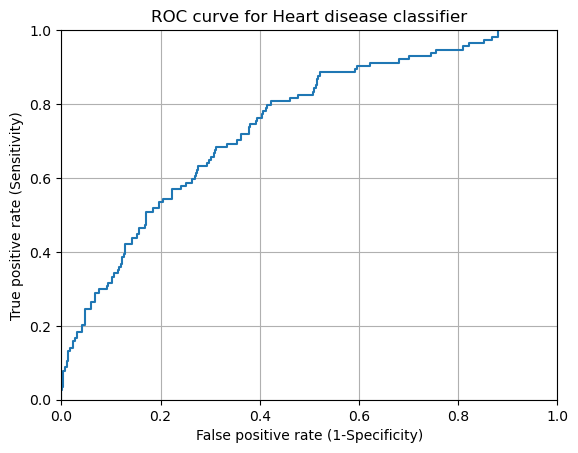

In [25]:
from sklearn.metrics import roc_curve
fpr, tpr, thresholds = roc_curve(y_test, y_pred_prob[:,1])
plt.plot(fpr,tpr)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.title('ROC curve for Heart disease classifier')
plt.xlabel('False positive rate (1-Specificity)')
plt.ylabel('True positive rate (Sensitivity)')
plt.grid(True)

#### the ROC curve gives us a comprehensive view of the model's performance at all threshold levels, and it can help us choose a threshold that balances sensitivity and specificity in a way that makes sense for the particular context.